### Pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importando os dados  

Os dados foram formatados e filtrados em outros arquivos.  

Lembrando que, dos mais de 3.3 milhões de inscritos para a prova no ano de 2021, foram removidos da base de dados todos os participantes inscritos como treineiros (uma vez que eles não se beneficiariam de nenhum direito o ENEM proporciona) e os indivíduos que não compareceram em nenhum dos dias da realização do exame (ausentes).  

Nesse primeiro momento, a seguinte análise considerada as variáveis socioeconômicas dos candidatos.

In [12]:
dados = pd.read_csv('C:/Users/Matias/Documents/Projetos_e_Estudos/ENEM_2021/DADOS/ENEM_2021_FINAL.csv',
                    encoding='UTF-8', sep = ',')
dados.shape

(1988276, 15)

### Declarando algumas variáveis

In [3]:
total_inscritos = 3389832

total_nao_treineiros = 2952642



### Informações do dataset

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988276 entries, 0 to 1988275
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   num_inscricao          int64  
 2   faixa_etaria           object 
 3   sexo                   object 
 4   raca_cor               object 
 5   ano_conclusao          int64  
 6   escola                 object 
 7   municipio              object 
 8   uf                     object 
 9   nota_ciencia_natureza  float64
 10  nota_ciencia_humana    float64
 11  nota_linguagens        float64
 12  nota_matematica        float64
 13  redacao                float64
 14  status                 object 
dtypes: float64(5), int64(3), object(7)
memory usage: 227.5+ MB


In [4]:
dados.head(10)

,Unnamed: 0,num_inscricao,faixa_etaria,sexo,raca_cor,ano_conclusao,escola,municipio,uf,nota_ciencia_natureza,nota_ciencia_humana,nota_linguagens,nota_matematica,redacao,status
0,0,210053865474,20 anos,Feminino,Branca,3,Não Respondeu,NaN,NaN,0.0,574.6,472.6,0.0,760.0,Não Habilitado
1,1,210052384164,Entre 31 e 35 anos,Masculino,Branca,11,Não Respondeu,NaN,NaN,505.9,551.8,498.3,461.5,560.0,Habilitado
2,3,210052128335,18 anos,Masculino,Parda,0,Pública,Crato,CE,580.7,678.9,638.9,659.5,780.0,Habilitado
3,4,210051353021,17 anos,Feminino,Parda,0,Pública,Redenção,CE,497.7,532.4,457.6,582.6,780.0,Habilitado
4,6,210052615524,24 anos,Feminino,Parda,6,Não Respondeu,NaN,NaN,0.0,511.9,420.4,0.0,480.0,Não Habilitado
5,8,210053417016,23 anos,Feminino,Parda,0,Pública,NaN,NaN,487.4,476.5,450.7,493.4,520.0,Habilitado
6,9,210051128744,19 anos,Feminino,Parda,0,Pública,NaN,NaN,507.6,539.2,494.6,413.3,380.0,Habilitado
7,10,210052320506,20 anos,Feminino,Parda,2,Não Respondeu,NaN,NaN,650.9,617.9,631.7,796.7,980.0,Habilitado
8,11,210054444526,17 anos,Feminino,Branca,0,Pública,NaN,NaN,378.5,502.7,487.7,514.9,680.0,Habilitado
9,12,210053193408,Entre 26 e 30 anos,Masculino,Parda,11,Não Respondeu,NaN,NaN,537.6,476.5,553.2,509.7,560.0,Habilitado


#### Missing Values

Note que mais de 68% das variáveis UF e municípios são valores faltantes, indicando assim que pouco valor pode ser extraído dessas colunas. 

In [6]:
#quantidade de missing values de cada variável
num_na = np.array([sum(dados[i].isnull()) for i in list(dados.columns)])
prop_na = num_na/len(dados)

d = {'var':list(dados.columns), 'num_na':num_na, 'prop':prop_na.round(2)}
na_count = pd.DataFrame(data = d).sort_values(by=['num_na'], ascending = False)

na_count

,var,num_na,prop
7,municipio,1353777,0.68
8,uf,1353777,0.68
0,Unnamed: 0,0,0.00
1,num_inscricao,0,0.00
2,faixa_etaria,0,0.00
3,sexo,0,0.00
4,raca_cor,0,0.00
5,ano_conclusao,0,0.00
6,escola,0,0.00
9,nota_ciencia_natureza,0,0.00


Apesar do número significativos de missing values,  observe que São Paulo é o estado com o maior número de candidatos.

In [52]:
uf = dados['uf'].value_counts(dropna=True).reset_index()
uf.columns = ['UF','n']
uf['prop'] = round(uf['n']/uf['n'].sum(),3)
uf

,UF,n,prop
0,SP,118119,0.186
1,CE,62632,0.099
2,MG,52721,0.083
3,RJ,46555,0.073
4,BA,36745,0.058
5,PR,34667,0.055
6,PE,31173,0.049
7,RS,29592,0.047
8,GO,26257,0.041
9,PA,22142,0.035


Como as variáveis mencionadas acima apresentam uma elevada quantidade de valores faltantes, ambas as colunas serão removidas para facilitar o processamento dos dados.

In [53]:
dados = dados.drop(['uf','Unnamed: 0','municipio'],axis=1)
dados.shape

(1988276, 12)

### Tabelas e Medidas

As medidas calculadas aqui consideram somente os inscritos não-treineiros e os candidatos que compareceram em pelo menos um dos dias da realização do exame.

##### Sexo

In [16]:
sexo = dados.groupby('sexo').agg(n = ('sexo','count'))
sexo['prop'] = round(sexo['n']/len(dados),3)
sexo

,n,prop
sexo,,
Feminino,1212066,0.61
Masculino,776210,0.39


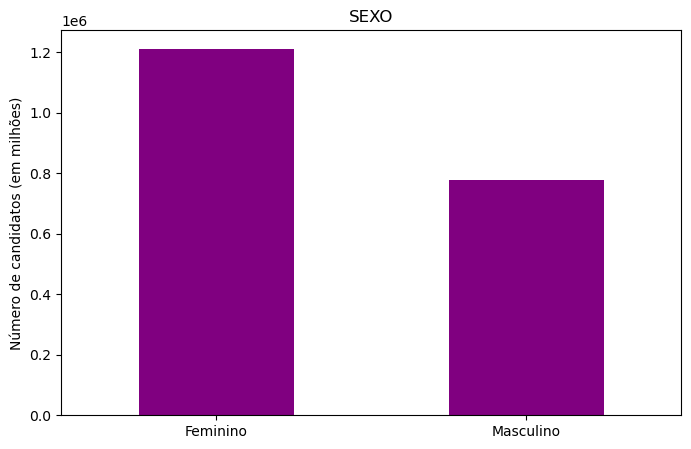

In [38]:
barplot_sexo = sexo.plot(kind='bar', y = 'n', rot = 0, legend=False, color = 'purple', title = 'SEXO', xlabel= '', ylabel= 'Número de candidatos (em milhões)',
          figsize=(8,5))

<AxesSubplot:>

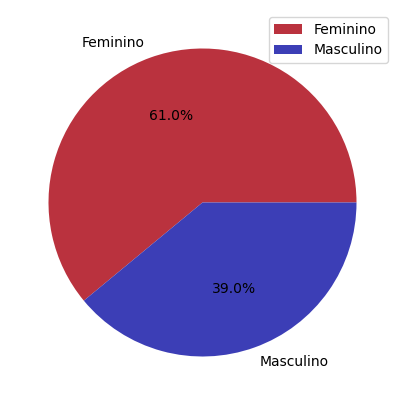

In [24]:
pie_sexo = sexo.plot.pie(y = 'prop', title = '', ylabel = '', figsize = (8,5), colors = ['#ba323e','#3c3eb6'], autopct='%1.1f%%')
pie_sexo

#### Faixa Etária

In [65]:
fatores = ['Menor de 17 anos','17 anos', '18 anos', '19 anos', '20 anos','21 anos', '22 anos', '23 anos', '24 anos', '25 anos', 
           'Entre 26 e 30 anos', 'Entre 31 e 35 anos', 'Entre 36 e 40 anos', 'Entre 41 e 45 anos', 'Entre 46 e 50 anos', 'Entre 51 e 55 anos', 
             'Entre 56 e 60 anos', 'Entre 61 e 65 anos', 'Entre 66 e 70 anos', 'Maior de 70 anos']

dados['faixa_etaria'] = pd.Categorical(dados['faixa_etaria'], categories = fatores, ordered = True)

faixa_etaria = dados.groupby('faixa_etaria').agg(n = ('faixa_etaria','count')).sort_values('faixa_etaria', ascending = False)

faixa_etaria

,n
faixa_etaria,
Maior de 70 anos,332
Entre 66 e 70 anos,795
Entre 61 e 65 anos,2345
Entre 56 e 60 anos,6042
Entre 51 e 55 anos,11372
Entre 46 e 50 anos,19092
Entre 41 e 45 anos,29437
Entre 36 e 40 anos,44565
Entre 31 e 35 anos,60872


<AxesSubplot:title={'center':'Faixa Etária'}>

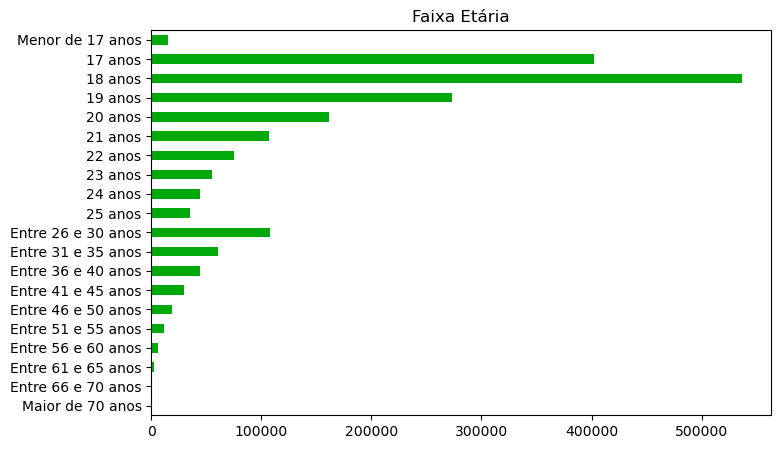

In [96]:
barplot_faixa_etaria = faixa_etaria.plot(kind='barh', y = 'n', rot = 0, legend=False, color = '#00a90a', title = 'Faixa Etária', xlabel= '', ylabel= 'Número de candidatos (em milhões)',
          figsize=(8,5))
barplot_faixa_etaria

##### Raça e Cor

In [84]:
raca_cor = dados.groupby('raca_cor').agg(n = ('raca_cor','count')).sort_values('n', ascending=False).query("raca_cor != 'Não dispõe da informação'")
raca_cor

,n
raca_cor,
Parda,839878
Branca,820778
Preta,237758
Amarela,40217
Não declarado,39215
Indígena,10428


<AxesSubplot:title={'center':'Raça/Cor'}, ylabel='Número de candidatos'>

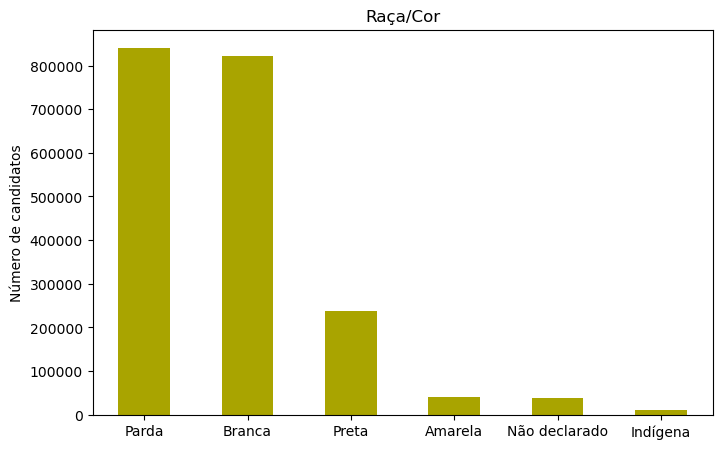

In [97]:
barplot_raca_cor = raca_cor.plot(kind='bar', y = 'n', rot = 0, legend=False, color = '#a9a400', title = 'Raça/Cor', xlabel= '', ylabel= 'Número de candidatos',
          figsize=(8,5))
barplot_raca_cor

#### Tipo de Escola

Note que a variável 'Escola' possui mais de 55% das respostas como não respondidas, apesar de ser uma variável bastante importante para fins de análise.


In [8]:
escola = dados.groupby('escola').agg(n = ('escola','count')).sort_values('n', ascending=False)
escola['prop'] = round(escola['n']/len(dados),3)

escola

,n,prop
escola,,
Não Respondeu,1093430,0.550
Pública,711671,0.358
Privada,183175,0.092


<AxesSubplot:title={'center':'Tipo de Escola'}, ylabel='Número de candidatos'>

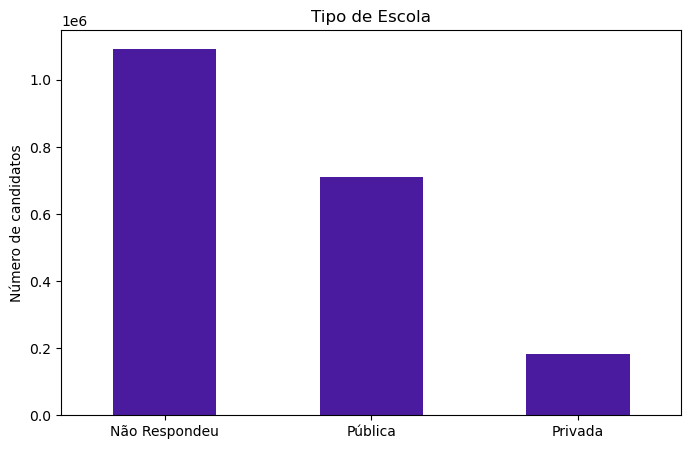

In [9]:
barplot_escola = escola.plot(kind='bar', y = 'n', rot = 0, legend=False, color = '#4a1b9e', title = 'Tipo de Escola', xlabel= '', ylabel= 'Número de candidatos',
          figsize=(8,5))
barplot_escola

#### Status

Status foi uma variável construida para verificar os candidatos aptos a participarem das vagas de universidades públicas via SISU. Se algum candidato(a) tirou nota zero em alguma área do conhecimento então este(a) não está qualificado(a).  

Os candidatos com nota zero em alguma área (provavelmente) se ausentaram em algum dos dois dias de prova.

In [10]:
status = dados.groupby('status').agg(n = ('status','count')).sort_values('n', ascending=False)
status['prop'] = round(status['n']/len(dados),3)
status

,n,prop
status,,
Habilitado,1821061,0.916
Não Habilitado,167215,0.084


<AxesSubplot:title={'center':'Status'}, ylabel='Número de candidatos'>

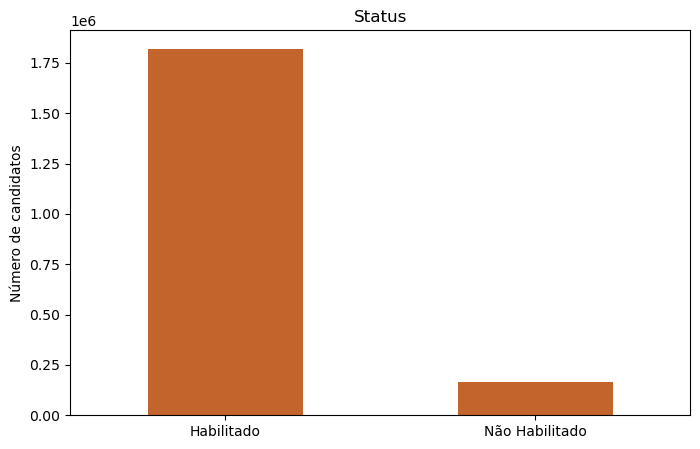

In [11]:
barplot_status = status.plot(kind='bar', y = 'n', rot = 0, legend=False, color = '#c4642d', title = 'Status', xlabel= '', ylabel= 'Número de candidatos',
          figsize=(8,5))

barplot_status

### Pontuação das Provas

In [5]:
habilitados = dados.query("status == 'Habilitado'")
habilitados = habilitados.drop(['status'], axis = 1)
habilitados.head(10)

,Unnamed: 0,num_inscricao,faixa_etaria,sexo,raca_cor,ano_conclusao,escola,municipio,uf,nota_ciencia_natureza,nota_ciencia_humana,nota_linguagens,nota_matematica,redacao
1,1,210052384164,Entre 31 e 35 anos,Masculino,Branca,11,Não Respondeu,NaN,NaN,505.9,551.8,498.3,461.5,560.0
2,3,210052128335,18 anos,Masculino,Parda,0,Pública,Crato,CE,580.7,678.9,638.9,659.5,780.0
3,4,210051353021,17 anos,Feminino,Parda,0,Pública,Redenção,CE,497.7,532.4,457.6,582.6,780.0
5,8,210053417016,23 anos,Feminino,Parda,0,Pública,NaN,NaN,487.4,476.5,450.7,493.4,520.0
6,9,210051128744,19 anos,Feminino,Parda,0,Pública,NaN,NaN,507.6,539.2,494.6,413.3,380.0
7,10,210052320506,20 anos,Feminino,Parda,2,Não Respondeu,NaN,NaN,650.9,617.9,631.7,796.7,980.0
8,11,210054444526,17 anos,Feminino,Branca,0,Pública,NaN,NaN,378.5,502.7,487.7,514.9,680.0
9,12,210053193408,Entre 26 e 30 anos,Masculino,Parda,11,Não Respondeu,NaN,NaN,537.6,476.5,553.2,509.7,560.0
10,15,210053021203,19 anos,Feminino,Parda,1,Não Respondeu,NaN,NaN,462.2,402.2,403.3,445.8,540.0
11,16,210053788150,22 anos,Feminino,Branca,4,Não Respondeu,NaN,NaN,487.9,419.9,488.2,553.1,720.0


#### Histogramas

Text(0, 0.5, 'Número de Candidatos')

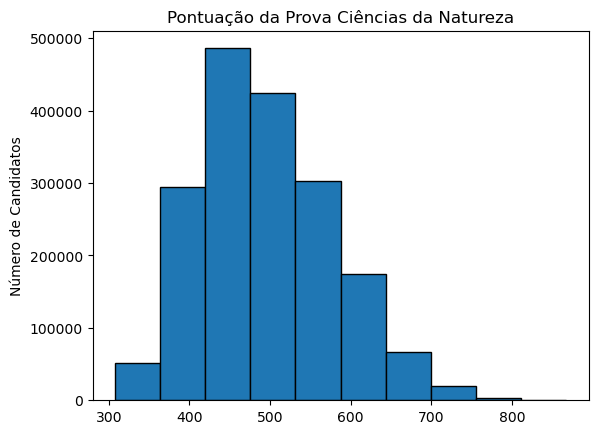

In [111]:
hist_humana = habilitados.hist(column = ['nota_ciencia_natureza'],bins = 10, grid = False, edgecolor = 'black')
plt.title('Pontuação da Prova de Ciências da Natureza')
plt.ylabel('Número de Candidatos')

Text(0, 0.5, 'Número de Candidatos')

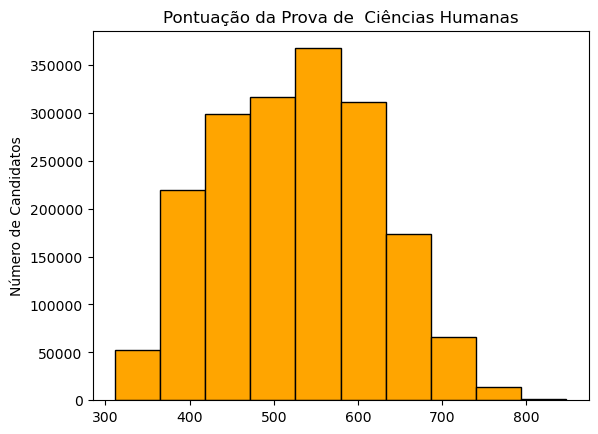

In [113]:
habilitados.hist(column = ['nota_ciencia_humana'],bins = 10, grid = False, edgecolor = 'black', color = 'orange')
plt.title('Pontuação da Prova de Ciências Humanas')
plt.ylabel('Número de Candidatos')

Text(0, 0.5, 'Número de Candidatos')

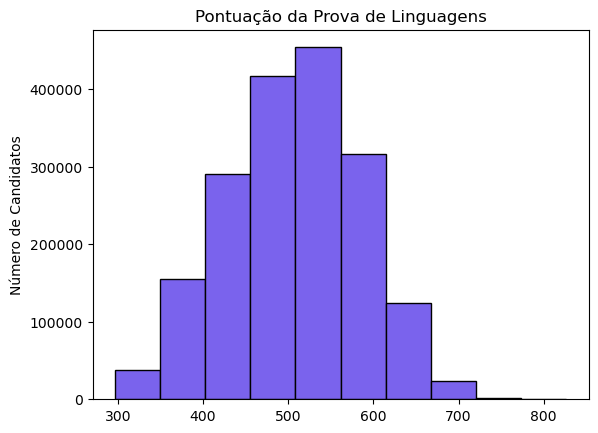

In [122]:
habilitados.hist(column = ['nota_linguagens'],bins = 10, grid = False, edgecolor = 'black', color = '#7a63ed')
plt.title('Pontuação da Prova de Linguagens')
plt.ylabel('Número de Candidatos')

Text(0, 0.5, 'Número de Candidatos')

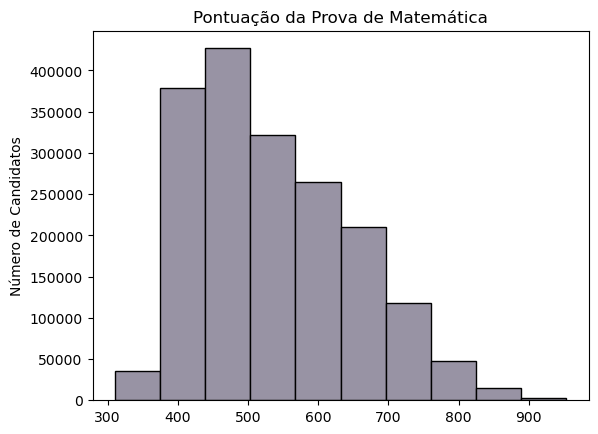

In [123]:
habilitados.hist(column = ['nota_matematica'],bins = 10, grid = False, edgecolor = 'black', color = '#9893a4')
plt.title('Pontuação da Prova de Matemática')
plt.ylabel('Número de Candidatos')

Text(0, 0.5, 'Número de Candidatos')

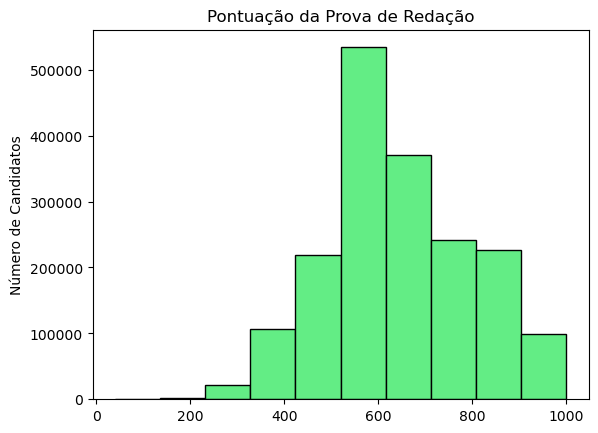

In [115]:
habilitados.hist(column = ['redacao'],bins = 10, grid = False, edgecolor = 'black', color = '#63ed85')
plt.title('Pontuação da Prova de Redação')
plt.ylabel('Número de Candidatos')

##### Tabelas Exploratórias

In [58]:
n_notas_zero = [len(dados.query("nota_ciencia_natureza == 0")), len(dados.query("nota_ciencia_humana == 0")),len(dados.query("nota_linguagens == 0")),
                len(dados.query("nota_matematica == 0")), len(dados.query("redacao == 0"))]

n_notas_zero

[112725, 7949, 6023, 112787, 70739]

In [69]:
medias = habilitados[['nota_ciencia_natureza', 'nota_ciencia_humana', 'nota_linguagens', 'nota_matematica', 'redacao']].mean().round(2)
medias

nota_ciencia_natureza    495.03
nota_ciencia_humana      527.14
nota_linguagens          506.80
nota_matematica          536.56
redacao                  640.24
dtype: float64

In [82]:
desvio_padrao = habilitados[['nota_ciencia_natureza', 'nota_ciencia_humana', 'nota_linguagens', 'nota_matematica', 'redacao']].std().round(2)
desvio_padrao

nota_ciencia_natureza     81.72
nota_ciencia_humana       94.03
nota_linguagens           78.13
nota_matematica          112.03
redacao                  154.45
dtype: float64

In [127]:
maximo = habilitados[['nota_ciencia_natureza', 'nota_ciencia_humana', 'nota_linguagens', 'nota_matematica', 'redacao']].max().round(2)
maximo

nota_ciencia_natureza     867.1
nota_ciencia_humana       846.9
nota_linguagens           826.1
nota_matematica           953.1
redacao                  1000.0
dtype: float64

In [125]:
minimo = habilitados[['nota_ciencia_natureza', 'nota_ciencia_humana', 'nota_linguagens', 'nota_matematica', 'redacao']].min().round(2)
minimo

nota_ciencia_natureza    307.7
nota_ciencia_humana      311.6
nota_linguagens          296.8
nota_matematica          310.5
redacao                   40.0
dtype: float64

In [135]:
resumo = pd.concat([medias, desvio_padrao,maximo,minimo], ignore_index = True, axis = 1)
resumo.columns = ['Média', 'SD','Máximo','Mínimo']
resumo['n_Zero'] = n_notas_zero
resumo.index = ['Ciência da Natureza','Ciências Humanas','Linguagens','Matemática','Redação']
resumo

,Média,SD,Máximo,Mínimo,n_Zero
Ciência da Natureza,495.03,81.72,867.1,307.7,112725
Ciências Humanas,527.14,94.03,846.9,311.6,7949
Linguagens,506.80,78.13,826.1,296.8,6023
Matemática,536.56,112.03,953.1,310.5,112787
Redação,640.24,154.45,1000.0,40.0,70739


In [6]:
len(habilitados)

1821061

#### Pontuação das provas, segundo Sexo e Raça/Cor